In [10]:
import pandas as pd
import plotly.express as px

In [11]:
profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
}

all_profiles = {
    "ORF": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony",
    "ORF-CRISPR-pipeline": "wellpos_var_mad_int_featselect_harmony_PCA",
    "CRISPR": "wellpos_var_mad_int_featselect_harmony_PCA_corrected",
    "CRISPR-ORF-pipeline": "wellpos_cc_var_mad_outlier_featselect_sphering_harmony_PCA_corrected",
}

modality = {
    "ORF": "ORF",
    "CRISPR": "CRISPR",
    "ORF-CRISPR-pipeline": "ORF",
    "CRISPR-ORF-pipeline": "CRISPR",
}

color_discrete_map = {
    "ORF": "#",
    "CRISPR": "red",
}

Read phenotypic activity data

In [12]:
phenotypic_activity_df = pd.DataFrame()

for profile in profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    phenotypic_activity_df = pd.concat(
        [phenotypic_activity_df, df], ignore_index=True, axis=0
    )

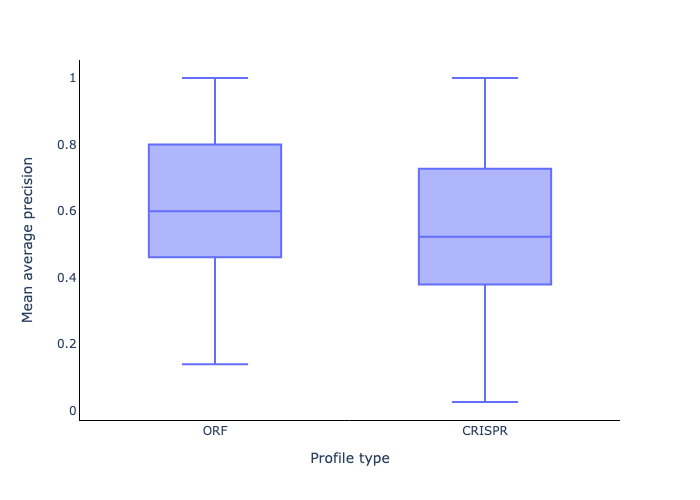

In [18]:
fig = (
    px.box(phenotypic_activity_df, x="profile_type", y="mean_average_precision")
    .update_layout(
        xaxis=dict(title="Profile type", linecolor="black"),
        yaxis=dict(title="Mean average precision", linecolor="black"),
        plot_bgcolor="white",
    )
)

fig.show("png")

In [27]:
fraction_retrieved = (
    phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type   |   fraction_retrieved |
|:---------------|---------------------:|
| CRISPR         |             0.716955 |
| ORF            |             0.562987 |


In [29]:
all_phenotypic_activity_df = pd.DataFrame()

for profile in all_profiles:
    df = pd.read_csv(f"output/phenotypic-activity-{all_profiles[profile]}.csv.gz")
    df["profile_type"] = profile
    all_phenotypic_activity_df = pd.concat(
        [all_phenotypic_activity_df, df], ignore_index=True, axis=0
    )

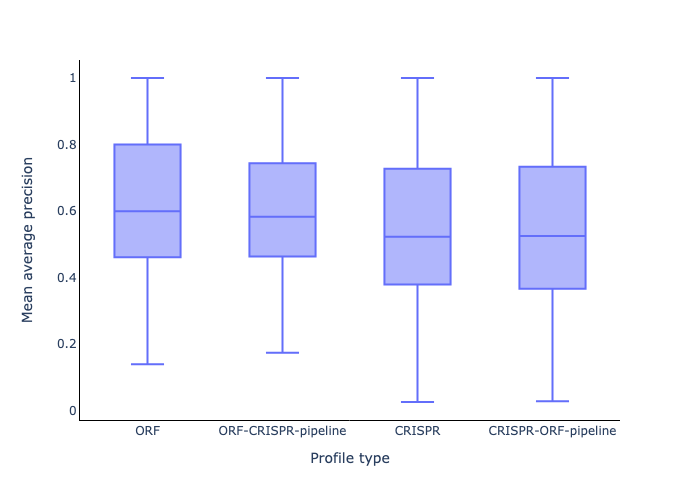

In [30]:
fig = (
    px.box(all_phenotypic_activity_df, x="profile_type", y="mean_average_precision")
    .update_layout(
        xaxis=dict(title="Profile type", linecolor="black"),
        yaxis=dict(title="Mean average precision", linecolor="black"),
        plot_bgcolor="white",
    )
)

fig.show("png")

In [31]:
fraction_retrieved = (
    all_phenotypic_activity_df.groupby("profile_type")
    .below_corrected_p.apply(lambda x: (x == True).sum() / len(x))
    .reset_index()
    .rename(columns={"below_corrected_p": "fraction_retrieved"})
)

print(fraction_retrieved.to_markdown(index=False))

| profile_type        |   fraction_retrieved |
|:--------------------|---------------------:|
| CRISPR              |             0.716955 |
| CRISPR-ORF-pipeline |             0.699774 |
| ORF                 |             0.562987 |
| ORF-CRISPR-pipeline |             0.519828 |
